# **Assignment 2:** Convolutional Autoencoder

#### **Course:** SCC0270-SCC5809 Artificial Neural Networks

#### **Professor:** Moacir Antonelli Ponti

#### **Assistant:** Ana Letícia Garcez Vicente


---
### **Personal Info:**
*   **Student:**
    *   Your Name
    *   Your USP Number

In this assignment you will practice building a Convolutional Autoencoder on the Google Colab environment and with PyTorch. The goals of this practice are the following:

-   Develop familiarity with uploading a dataset.
-   Gain experience with building a model.
-   Train a Convolutional Autoencoder.
-   Use visualization tools to evaluate your result.
- Use the trained Autoencoder as a feature extractor

![image.png](attachment:image.png)

# 1. Dataset

MNIST is a dataset of handwritten digits (0 - 9) with 60.000 samples for training and 10.000 for testing.

http://yann.lecun.com/exdb/mnist/

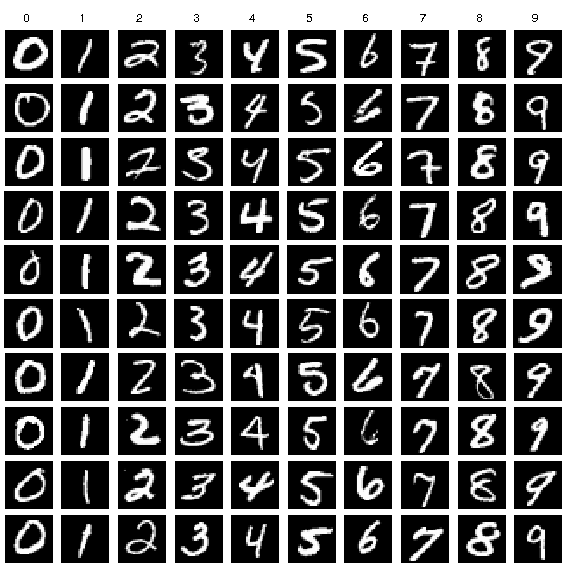

## Preparing Task: Download training and testing sets of MNIST using Pytorch framework

In [ ]:
import torchvision

batch_size = 128

# implementation here
# Remember of transforming the images to tensors


# 2. Denoising Convolutional Autoencoder

The concept of an Autoencoder is illustrated in the image above, comprising two fundamental components: the encoder and the decoder. The encoder takes the input, which in our case is a noisy image, and transforms it into a latent space representation. Subsequently, the decoder receives this encoded image and endeavors to reconstruct the original image, this time removing the noise from it.


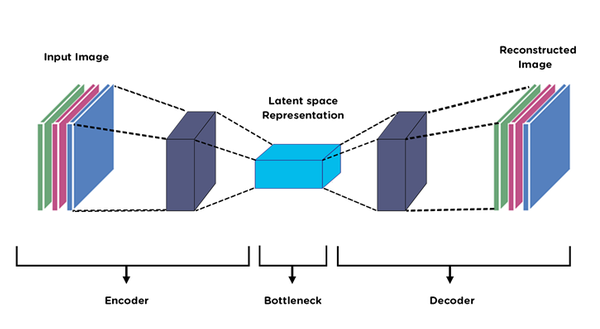

#### Adding noise to the images - Gaussian Noise

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
import torch

def add_noise(x, stddev=0.2):
    noise = torch.randn(x.size()) * stddev
    if x.is_cuda:
        noise = noise.to(device)
    noisy_x = x + noise
    return torch.clamp(noisy_x, 0, 1)

Visualizing original samples and samples with Gaussian noise

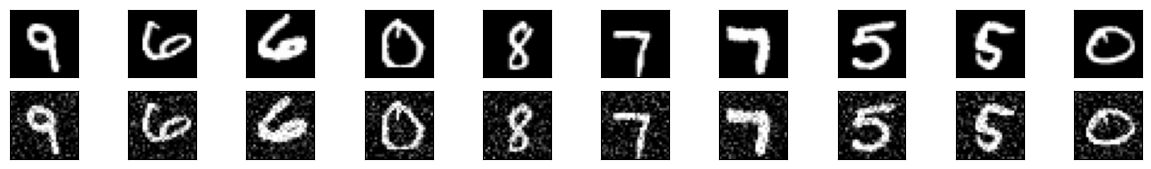

In [ ]:
import matplotlib.pyplot as plt
dataiter = iter(train_loader)
imgs, _ = next(dataiter)
noisy_imgs = add_noise(imgs)

n = 10
plt.figure(figsize=(15, 3))
for i in range(n):

    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(imgs[i].squeeze().numpy(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(noisy_imgs[i].squeeze().numpy(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## **Task 1:** (3 pts) Can you build a denoising Autoencoder?

#### Build a Denoising Autoencoder, following the configuration and parameters described in the instructions and image below

1. Implement a method for encoding, that takes an input image and generates a Vector of 128 dimensions,
2. Implement a method for decoding, that takes a vector of 128 dimensions and outputs an image,
3. The method `forward` will call the encoding and decoding methods.


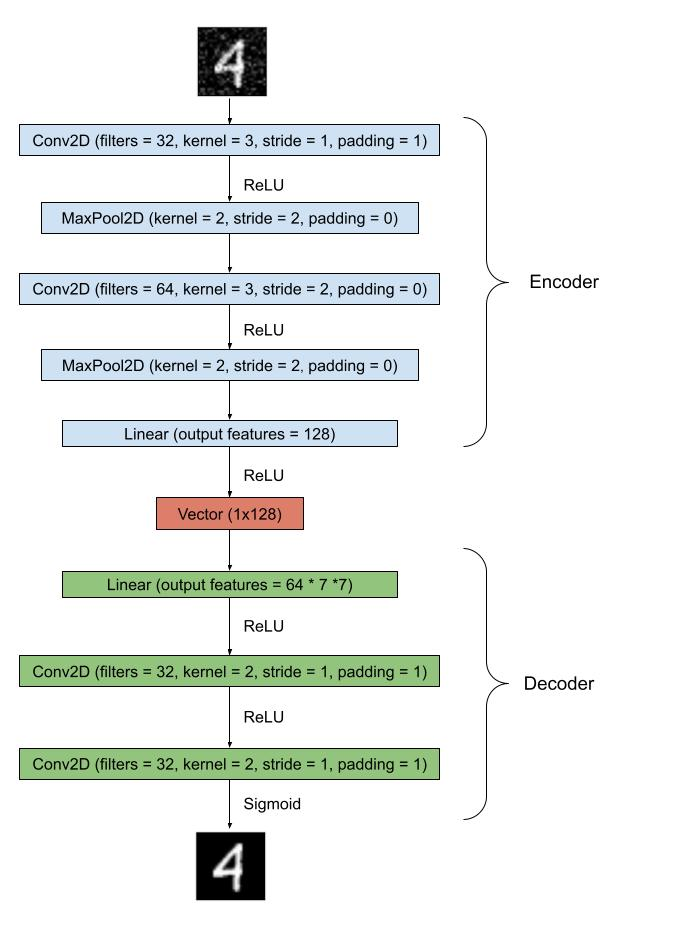


**Tip:** Be careful with dimensionality

When transitioning between convolutional and linear operations, it's essential to adapt the input of each layer accordingly.

Below, you can see an example on how to make this adjustment.

In [ ]:
# Changing the organization of an tensor

dataiter = iter(test_loader)
imgs, _ = next(dataiter)

# Lets se the shape of 1 image
img = imgs[1]
print("Image shape:", img.shape, '\n')

# for flattening (to allow use linear layers) we need to change the dimension to a vector
vector = img.view(img.size(0), -1)
print("Vector shape:", vector.shape)
print("We can observe that the image 28x28 was transformed to a vector of 28*28 = 784", '\n')

# for the inverse
img = vector.view(vector.size(0), 28, 28)
print("Image shape:", img.shape, '\n')

Image shape: torch.Size([1, 28, 28]) 

Vector shape: torch.Size([1, 784])
We can observe that the image 28x28 was transformed to a vector of 28*28 = 784 

Image shape: torch.Size([1, 28, 28]) 



In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            # complete
        )

        self.linear_encoder = nn.Sequential(
            # complete
        )

        self.linear_decoder = nn.Sequential(
            # complete
        )

        self.decoder = nn.Sequential(
            # complete
        )

    def forward(self, x):
        # complete
        return x

In [ ]:
autoencoder = Autoencoder.to(device)

# 3. Training

## **Task 2:** (3 pts) Training the Autoencoder

Use the BCE Loss and the Adam optimizer with an initial learning rate of 0.0005

In [ ]:
criterion = # complete
optimizer = # complete

num_epochs = 40

# Complete with the training algorithm
# Remember to change the device of the images
# Remember that we can see how the loss are changing along the epochs

## **Task 2.1**: (0.5 pt) Name another loss function that could be used for training. Which images do we use for calculating the loss?

Answer:

# 4. Visualizing the results

In [ ]:
dataiter = iter(test_loader)
imgs, _ = next(dataiter)
imgs = imgs.cuda()
noisy_imgs = add_noise(imgs)



# Denoise the noisy images
denoised_imgs = autoencoder(noisy_imgs)

imgs = imgs.to(torch.device('cpu'))
noisy_imgs = noisy_imgs.to(torch.device('cpu'))
denoised_imgs = denoised_imgs.to(torch.device('cpu'))

# Visualize original, noisy, and denoised images
n = 10
plt.figure(figsize=(15, 3))
for i in range(n):

    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(imgs[i].squeeze().numpy(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(noisy_imgs[i].squeeze().numpy(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_imgs[i].detach().squeeze().numpy(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# 5. Experimenting with different noise levels.

## **Task 3:** (3 pts): run an experiment, training 5 denoising autoencoders

Each model will be trained with images using different noise levels, parametrized by the following standard deviation values: 0.1, 0.2, 0.3, 0.4 and 0.5. Use 25 epochs for training.

After training:
1. On a single plot, show the curves of the loss functions evaluated on the training set for the 5 models.
2. Compare the 5 models, by:
  1. evaluating the average loss function value on the test set,
  2. showing images reconstructed by the 5 models

## **Task 3.1**: (0.5 pt) Write your observations about the experiments

Answer:

# 6. Encoder as a feature extractor

## **Task 4:** optional/extra (1 pt) Training an external classifier

Use one of the trained models of your choice trained in task 3.

1. Use the `encoding` function to obtain a dataset of 128-dimensional features for all images of the training and testing sets. Convert those into numpy arrays.
2. Train a `LogisticRegression` classifier using the `sklearn` library using the training dataset (with 128 features obtained in step 1), see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html for more information about this method.
3. Compute and print the accuracy score of the model for the training and testing sets.

In [ ]:
from sklearn.linear_model import LogisticRegression